# Vision_Transformer
"AN IMAGE IS WORTH 16X16 WORDS: TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE"


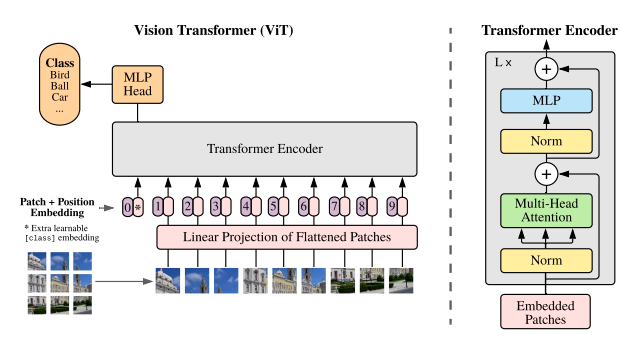

ref : https://arxiv.org/pdf/2010.11929.pdf

## Modules

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision.datasets as dset
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt
import os
import copy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dtype = torch.long

# reference & tutorial : http://einops.rocks/pytorch-examples.html
%pip install einops
from einops import rearrange, repeat, reduce
from einops.layers.torch import Rearrange

%pip install pytorch_transformers
from pytorch_transformers.optimization import WarmupCosineSchedule

## Image(Patch) embedding

In [ ]:
class ImageEmbedding(nn.Module):
  def __init__(self, in_channels, patch_size, emb_dim, img_size):
    super().__init__()

    self.rearrange = Rearrange('b c (num_w p1) (num_h p2) -> b (num_w num_h) (p1 p2 c) ', p1=patch_size, p2=patch_size)
    self.linear = nn.Linear(in_channels * patch_size * patch_size, emb_dim)
    self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
    self.positions = nn.Parameter(torch.randn((img_size//patch_size)**2 + 1, emb_dim))

  def forward(self, x):
    batch, channel, width, height = x.shape

    x = self.rearrange(x)
    x = self.linear(x)

    cls_tokens = repeat(self.cls_token, '() n e -> b n e', b=batch)
    x = torch.cat((cls_tokens, x), dim=1)

    x = x + self.positions
    return x

## Transformer

## Model

## Training

## Evaluation